**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 8**
Regresión Lineal

---



*   Aarón Cortés García A01730451
*   Héctor Segura Quintanilla A01154108
*   José Emilio Malagón Martínez A01794972
*   Oskar Abraham Guarneros Vázquez A01795329



In [248]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [249]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/Ciencia y analítica de datos/Semana 8"
os.chdir(DIR)

In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [251]:
insurance_df = pd.read_csv('insurance.csv')
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [252]:
# insurance_df['children'] = insurance_df['children'].astype(object) # Se convierte children en categórica desde un inicio

num_cols = insurance_df.select_dtypes(include=np.number).columns.tolist()
cat_cols = insurance_df.select_dtypes(include=np.object_).columns.tolist()

# **Parte 1**. EDA

Efectúa una exploración inicial de los datos a través de:

1a) Estadísticas descriptivas para todas las variables del dataframe.

In [253]:
print('Descripción de variables categóricas \n\n', insurance_df.describe(include=object).T)
print('\n')
print('Descripción de variables numéricas \n\n', insurance_df.describe(exclude=object).T)

Descripción de variables categóricas 

        count unique        top  freq
sex     1338      2       male   676
smoker  1338      2         no  1064
region  1338      4  southeast   364


Descripción de variables numéricas 

            count          mean           std        min         25%       50%  \
age       1338.0     39.207025     14.049960    18.0000    27.00000    39.000   
bmi       1338.0     30.663397      6.098187    15.9600    26.29625    30.400   
children  1338.0      1.094918      1.205493     0.0000     0.00000     1.000   
charges   1338.0  13270.422265  12110.011237  1121.8739  4740.28715  9382.033   

                   75%          max  
age          51.000000     64.00000  
bmi          34.693750     53.13000  
children      2.000000      5.00000  
charges   16639.912515  63770.42801  


1b) Búsqueda de valores faltantes.

In [254]:
insurance_df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

1c) Histogramas y boxplots para las variables cuantitativas y diagramas de barras con la frecuencia para las variables categóricas.

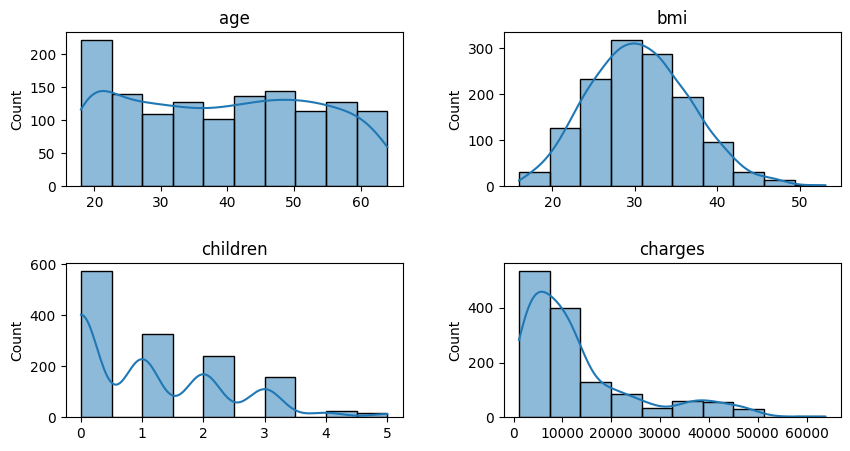

In [255]:
# Visualización de variables numéricas - Histogramas

fig, axes = plt.subplots(2,2, figsize = (10,5))
plt.subplots_adjust(wspace=0.3, hspace = 0.5)
axes = axes.ravel()

for col, ax in zip(insurance_df[num_cols], axes):
  sns.histplot(x = insurance_df[col], ax = ax, bins = 10, kde = True)
  ax.set(title = f'{col}', xlabel = None)

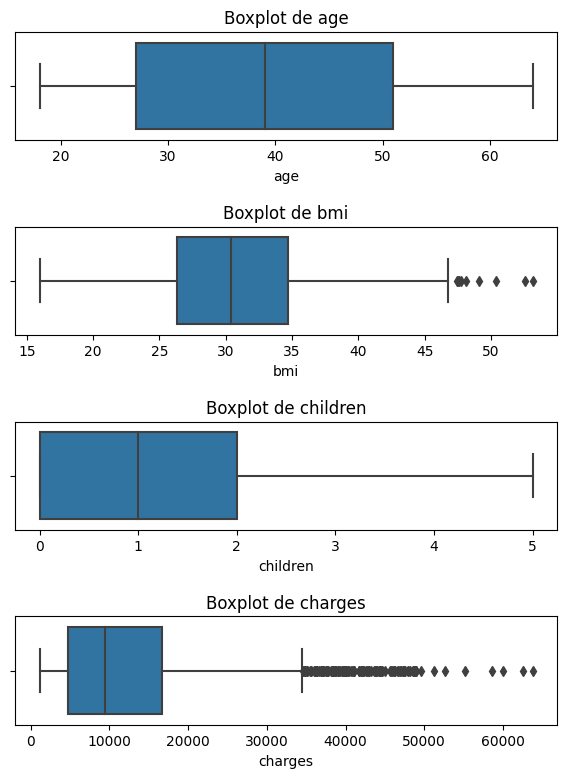

In [256]:
# Visualización de variables numéricas - Boxplots

variables = ["age", "bmi", "children", "charges"]
fig, axes = plt.subplots(len(variables), 1, figsize=(7, 9))
plt.subplots_adjust(hspace=0.8)

for i, var in enumerate(variables):
    sns.boxplot(x=insurance_df[var], ax=axes[i])
    axes[i].set_title(f'Boxplot de {var}')

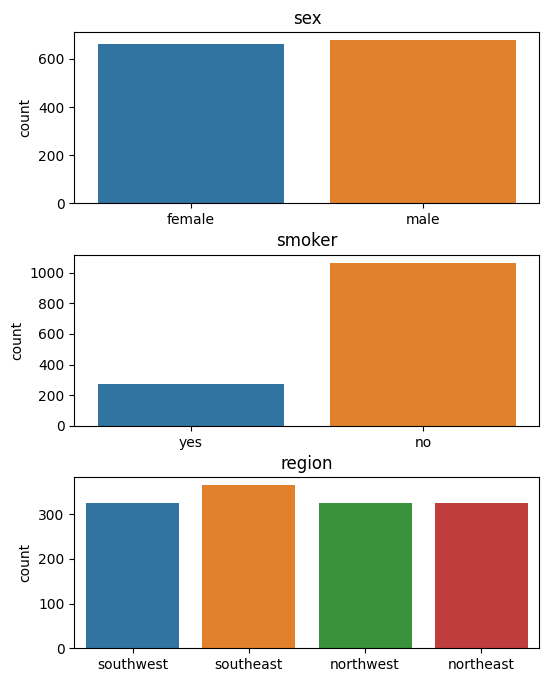

In [257]:
# Visualización de variables categóricas

fig, axes = plt.subplots(3,1, figsize=(6,8))
plt.subplots_adjust(hspace=0.3)
axes = axes.ravel()

for col, ax in zip(insurance_df[cat_cols], axes):
  sns.countplot(x=insurance_df[col], ax=ax)
  ax.set(title=f'{col}', xlabel=None)

Para responder los siguientes cuestionamientos, genera los gráficos indicados:

2a) ¿Hay diferencias significativas de las primas según el sexo? Compara la distribución de la variable `charges` por medio de un boxplot.

***Se observa a través del boxplot que el sexo masculino tiene un margen más amplio para la cantidad de la 'prima' ya que la caja se extiende a valores más elevados en comparación con el sexo femenino.***

***El valor máximo asimismo es mayor en el sexo masculino, aunque si solo se compara la mediana de los datos, resulta ser la misma o muy cercana.***

***Para ambos sexos, hay una cantidad considerable de valores atípicos hacia el lado incremental de la distribución.***

<Axes: xlabel='charges', ylabel='sex'>

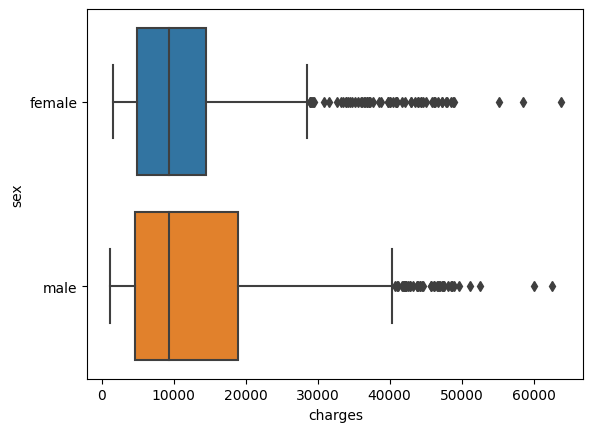

In [258]:
sns.boxplot(x='charges', y='sex', data=insurance_df)

2b) Crea un diagrama de dispersión de `charges` versus el `bmi` que incorpore la distinción por las categorías `smoker` y `children` (tip: utiliza el parámetro `size`) ¿Hay alguna conclusión importante que se derive del gráfico?

***Los cargos más altos parecen estar relacionados con el hecho de que las personas fumen, es decir, su grado de correlación resulta ser más significativo que con las otras variables. Mientras tanto, los índices de Masa Corporal y el número de hijos presentan distribuciones sin tendencias claras, expresando que el que alguien sea fumador o no, como tal no influye de manera evidente con estas características.***

<Axes: xlabel='charges', ylabel='bmi'>

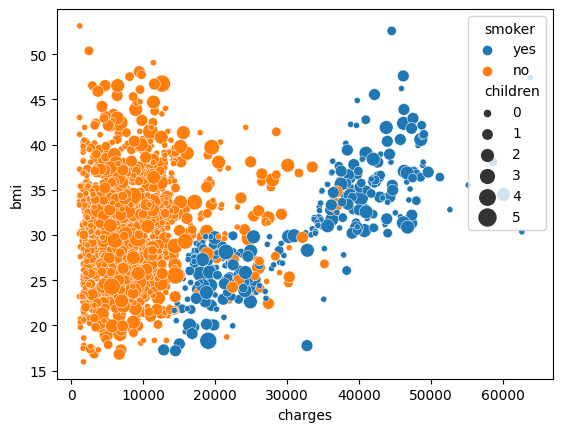

In [259]:
sns.scatterplot(data = insurance_df, x='charges', y='bmi', hue = 'smoker', size = 'children', sizes= (20, 150))

2c) Elabora un mapa de calor que muestre la correlación de las variables numéricas.

<Axes: >

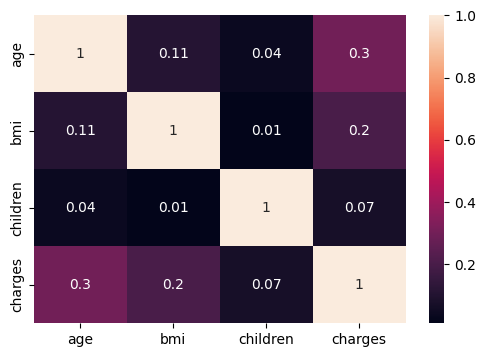

In [260]:
plt.figure(figsize = (6,4))
sns.heatmap(round(insurance_df.corr(numeric_only=True),2), annot = True)

Obtén un dataframe con las observaciones que tengan valores atípicos en `charges`.

3a) ¿Cuál es el promedio de `age` y de `bmi`?

***El promedio para 'age' es de 39.21, mientras que para 'bmi' es de 30.66***

In [261]:
#insurance_outliers=insurance_df
#insurance_outliers

In [262]:
Q1 = insurance_df.charges.quantile(0.25)
Q3 = insurance_df.charges.quantile(0.75)

IQR = Q3-Q1
IQR

upper_threshold = Q3 + 1.5 * IQR
lower_threshold = Q1 - 1.5 * IQR

# Filtrar observaciones con valores atípicos
df_insurance_out = insurance_df.loc[(insurance_df['charges'] > upper_threshold) | (insurance_df['charges'] < lower_threshold)]
df_insurance_out = df_insurance_out.reset_index(drop=True)
print(df_insurance_out)

avg_age = round(insurance_df['age'].mean(), 2)
avg_crs = round(insurance_df['bmi'].mean(), 2)
print(f'\nEl promedio de age es {avg_age}, mientras que el promedio de bmi es {avg_crs}')

     age     sex     bmi  children smoker     region      charges
0     27    male  42.130         0    yes  southeast  39611.75770
1     30    male  35.300         0    yes  southwest  36837.46700
2     34  female  31.920         1    yes  northeast  37701.87680
3     31    male  36.300         2    yes  southwest  38711.00000
4     22    male  35.600         0    yes  southwest  35585.57600
..   ...     ...     ...       ...    ...        ...          ...
134   45    male  30.360         0    yes  southeast  62592.87309
135   62    male  30.875         3    yes  northwest  46718.16325
136   43    male  27.800         0    yes  southwest  37829.72420
137   19  female  34.700         2    yes  southwest  36397.57600
138   42  female  40.370         2    yes  southeast  43896.37630

[139 rows x 7 columns]

El promedio de age es 39.21, mientras que el promedio de bmi es 30.66


3b) ¿Qué porcentaje de estas observaciones se corresponden a mujeres y a hombres? ¿A fumadores y no fumadores?

***Hombres - 64.03%, Mujeres - 35.97%, Fumadores - 97.84%, No Fumadores - 2.16%***

In [263]:
len_df_out = len(df_insurance_out)

num_males = len(df_insurance_out.loc[df_insurance_out['sex'] == 'male'])
percent_males = (num_males / len_df_out) * 100
num_females = len(df_insurance_out.loc[df_insurance_out['sex'] == 'female'])
percent_females = (num_females / len_df_out) * 100
smk_yes = len(df_insurance_out.loc[df_insurance_out['smoker'] == 'yes'])
percent_smkyes = (smk_yes / len_df_out) * 100
smk_no = len(df_insurance_out.loc[df_insurance_out['smoker'] == 'no'])
percent_smkno = (smk_no / len_df_out) * 100

print('El porcentaje de hombres es',round(percent_males,2), '%')
print('El porcentaje de mujeres es',round(percent_females, 2), '%')
print('El porcentaje de fumadores es',round(percent_smkyes,2), '%')
print('El porcentaje de no fumadores es',round(percent_smkno,2), '%')



El porcentaje de hombres es 64.03 %
El porcentaje de mujeres es 35.97 %
El porcentaje de fumadores es 97.84 %
El porcentaje de no fumadores es 2.16 %


# **Parte 2**. Preprocesamiento

4. Separa las variables del dataframe: en `X` coloca los predictores y en `y` la variable de respuesta o salida (`charges`).

In [264]:
# Variables predictoras
X = insurance_df.drop(columns=['charges'])

# Variable de salida 'charges'
y = insurance_df['charges']

In [265]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [266]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

5. Divide el conjunto en entrenamiento y prueba (80:20) considerando:


*   El parámetro `random_state` con el valor de 1 para garantizar reproducibilidad.
*   Analiza los diagramas de barras obtenidos en el ejercicio 1c. Con los resultados observados, es conveniente usar la variable `smoker` en la estrategia de estratificación.
*   Como ya tienes separadas en `X` e `y` los predictores y salida, consulta cómo ejecutar la función `train_test_split()` para obtener `Xtrain, Xtest, ytrain, ytest` en una única instrucción.

In [267]:
from sklearn.model_selection import train_test_split

# Dividir los datos en entrenamiento y prueba (80:20) con estratificación por 'smoker'
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=1, stratify=insurance_df['smoker'])

6. Prepara un transformador, denominado `preprocessing`, para aplicar escalamiento *MinMax* a los predictores numéricos y codificación *one-hot* a los categóricas.

In [268]:
from sklearn.compose import ColumnTransformer, make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.linear_model import LinearRegression


num_predictors = insurance_df.drop(columns=['charges']).select_dtypes(include=np.number).columns.tolist() # Nombres de columnas de predictores numéricos (se ignora el target "charges")
cat_predictos = cat_cols # Nombres de columnas de predictores categóricos

preprocessing = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), num_predictors),  # Min-Max para columnas numéricas
        ('cat', OneHotEncoder(drop='first'), cat_predictos)  # One-hot para columnas categóricas
    ],remainder='passthrough')

# **Parte 3**. Entrenando y evaluando el modelo de RL

7. Ejecuta un pipeline con el transformador creado y el algoritmo de regresión lineal para entrenar un modelo denominado `lr_model`.

Evalúa el modelo en el conjunto de prueba y obtén la raíz del error cuadrático medio (`RMSE`) y la métrica `R` cuadrado ($R^2$). Aunque ésta última la estudiarás a detalle la próxima semana, ahora sólo debes saber que toma valores entre 0 y 1, donde 1 indica un ajuste perfecto y, por tanto, un modelo muy fiable para las previsiones futuras. La función de scikit-learn que determina esta métrica es: [`r2_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)

***La raíz del error cuadrático medio calculada es 5699.03, mientras que la métrica R cuadrado es 0.75***

In [269]:
from sklearn.metrics import mean_squared_error, r2_score

# Construcción del modelo
lr_model = make_pipeline(preprocessing, LinearRegression())
lr_model.fit(Xtrain, ytrain)

# Obtención de predicciones conforme al modelo recién construido
predictions = lr_model.predict(Xtest)

# Cálculo de la raíz del error cuadrático medio
rmse = mean_squared_error(ytest, predictions, squared=False)
print(f"RMSE del Modelo 1:", rmse)

# Cálculo de R^2
r2 = r2_score(ytest, predictions)
print(f"R^2 del Modelo 1:", r2)

RMSE del Modelo 1: 5698.759784532356
R^2 del Modelo 1: 0.7538547215244324


**Valora el rendimiento del modelo con los siguientes cambios:**


8. Reemplaza los outliers de `charges` con el límite superior (`Q3 + 1.5 * IQR`). Haz el cambio en ambos conjuntos: `ytrain` y `ytest`, previo a la aplicación del mismo pipeline. Guarda el modelo como `lr_model2`.

***Por medio de estos reemplazos, se consigue aumentar ligeramente la efectividad del modelo, con una raíz del error cuadrático medio bajando hasta 4811.65 y una 'R' cuadrada de 0.76***


In [270]:
# Definición del límite superior
upper_limit = Q3 + 1.5 * IQR

# Reemplazo de outliers con el límite superior en ambos conjuntos 'y'
ytrain_cleaned = np.where(ytrain > upper_limit, upper_limit, ytrain)
ytest_cleaned = np.where(ytest > upper_limit, upper_limit, ytest)

# Construcción del modelo 2
lr_model2 = make_pipeline(preprocessing, LinearRegression())
lr_model2.fit(Xtrain, ytrain_cleaned)

# Obtención de predicciones conforme al modelo 2 recién construido
predictions = lr_model2.predict(Xtest)

# Cálculo de la raíz del error cuadrático medio
rmse_m2 = mean_squared_error(ytest_cleaned, predictions, squared=False)
print("RMSE del Modelo 2:", rmse_m2)

# Cálculo de R^2
r2_m2 = r2_score(ytest_cleaned, predictions)
print("R^2 del Modelo 2:", r2_m2)


RMSE del Modelo 2: 4812.06172831982
R^2 del Modelo 2: 0.7637776364359082


9. Prepara otro transformador, denominado `preprocessing2`, para aplicar escalamiento estándar a los predictores numéricos y codificación ordinal a los categóricas. Aplícalo en un nuevo pipeline utilizando nuevamente regresión lineal. Guarda el modelo como `lr_model3`.

**Nota.** Los cambios se ejecutan de manera consecutiva, por ejemplo: el reemplazo de los outliers también se ejecuta previo al transformador `preprocessing2` y así sucesivamente.

**Implementado el nuevo transformadror y utilizandolo para el entrenamiento del nuevo modelo (lr_model3), se obtuvieron los mismos resultados que el modelo (lr_model2) implementado diferentes metodos de escalamiento y codificación.**

In [271]:
preprocessing2 = ColumnTransformer([
                 ('num', StandardScaler(), make_column_selector(dtype_include=np.number)),
                 ('cat', OrdinalEncoder(), make_column_selector(dtype_include=object))])

In [272]:
lr_model3 = make_pipeline(preprocessing2, LinearRegression())
#lr_model3.fit(Xtrain,ytrain)
lr_model3.fit(Xtrain, ytrain_cleaned)
predictions3 = lr_model3.predict(Xtest)
#mean_squared_error(ytest, predictions, squared=False)
mean_squared_error(ytest_cleaned, predictions, squared=False)

print(r2_score(ytest_cleaned, predictions3))
rmse_m3 = mean_squared_error(ytest_cleaned, predictions3, squared=False)
print(rmse_m3)

0.7638229005936741
4811.600670456455


10. Utiliza regresión polinomial para verificar si se produce un mejor ajuste. Intenta con varios grados, aunque debes dejar en el código sólo el de mejor rendimiento. Guarda el modelo como `lr_model4`.

In [273]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [274]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify=X['smoker'])

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

# Entrenamos el modelo
lr_model4_pipeline = Pipeline([
    ('preprocessing', preprocessing2),
    ('polynomial_features', PolynomialFeatures(degree=2)),
    ('linear_regression', LinearRegression())
])

lr_model4_pipeline.fit(Xtrain, ytrain_cleaned)
y_pred_poly = lr_model4_pipeline.predict(Xtest)

# Calculamos RMSE y R^2 para le regreción polinomial
print(r2_score(ytest_cleaned, y_pred_poly))

0.8126404302016097
